# CUSTOMER CHURN PREDICTION

##  Importing Libraries and Dataset

In [2]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
df = pd.read_csv("C:/Users/sadik/Downloads/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,Germany,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Understanding the Dataset

In [5]:
print(df.isnull().sum())
print(df.describe())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.0

In [6]:
df[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


Exited
0    7963
1    2037
Name: count, dtype: int64


Text(0.5, 0, 'Churn (Yes / No)')

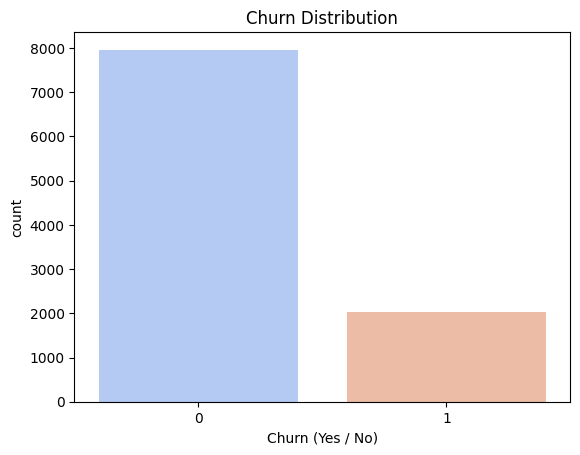

In [7]:
print(df['Exited'].value_counts())

sns.countplot(
    x='Exited',
    hue='Exited',
    data=df,
    palette='coolwarm',
    legend=False
)

plt.title('Churn Distribution')
plt.xlabel('Churn (Yes / No)')


## Handling Categorical Variables

In [8]:
df = pd.read_csv("C:/Users/sadik/Downloads/Churn_Modelling.csv")
label_encoder = LabelEncoder()
df['Gender']= label_encoder.fit_transform(df['Gender'])
df =pd.get_dummies(df, columns = ['Geography'], drop_first = True)


In [9]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,2,15647311,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,3,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,True,False
3,4,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,5,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


In [28]:
features = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
           'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_Germany', 'Geography_Spain']
X= df[features]
y = df['Exited']

In [40]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracies = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = RandomForestClassifier(n_estimators=200, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

print("Fold accuracies:", accuracies)
print("Mean CV accuracy:", np.mean(accuracies))



Fold accuracies: [0.8555, 0.857, 0.859, 0.872, 0.861]
Mean CV accuracy: 0.8609


In [53]:
from sklearn.metrics import confusion_matrix, classification_report

all_y_true = []
all_y_pred = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = RandomForestClassifier(n_estimators=200, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    all_y_true.extend(y_test)
    all_y_pred.extend(y_pred)

print("Confusion Matrix:\n", confusion_matrix(all_y_true, all_y_pred))
print("\nClassification Report:\n", classification_report(all_y_true, all_y_pred))


Confusion Matrix:
 [[7663  300]
 [1091  946]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      7963
           1       0.76      0.46      0.58      2037

    accuracy                           0.86     10000
   macro avg       0.82      0.71      0.75     10000
weighted avg       0.85      0.86      0.85     10000



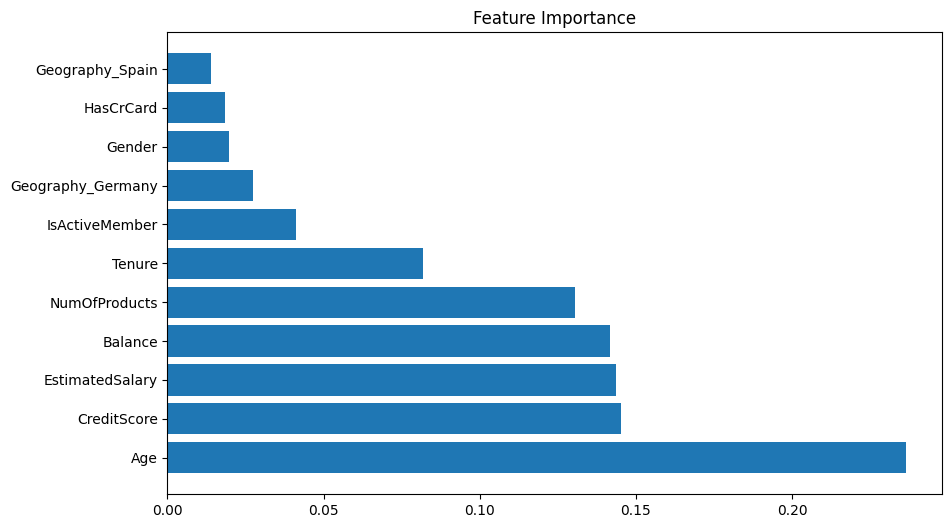

In [56]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
names = [features[i] for i in indices]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.barh(range(X.shape[1]), importances[indices])
plt.yticks(range(X.shape[1]), names)
plt.show()

## Interpretation:
**Feature importance analysis using Random Forest shows that Age is the strongest predictor of customer churn, followed by Credit Score, Estimated Salary, and Account Balance. This suggests that demographic and financial stability factors play a more significant role in churn behavior than geographic location. The feature Geography_Spain was found to have minimal impact on churn prediction.**

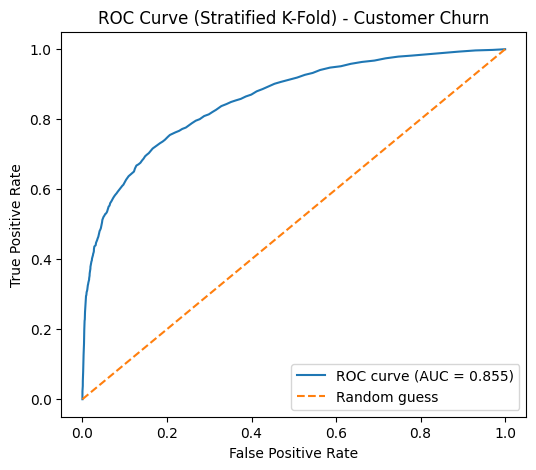

In [57]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

all_y_true = []
all_y_proba = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = RandomForestClassifier(n_estimators=200, random_state=42)
    model.fit(X_train, y_train)

    y_proba = model.predict_proba(X_test)[:, 1]  # probability of churn
    all_y_true.extend(y_test)
    all_y_proba.extend(y_proba)

# Compute ROC curve on all folds combined
fpr, tpr, _ = roc_curve(all_y_true, all_y_proba)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Stratified K-Fold) - Customer Churn')
plt.legend()
plt.show()


## Interpretation:
**The ROC curve lies well above the diagonal reference line and bends towards the top-left corner, indicating that the model performs significantly better than random guessing. This suggests that the model can effectively distinguish between churned and non-churned customers, achieving a high true positive rate while maintaining a relatively low false positive rate.**